In [140]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.utils import to_categorical

from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential
import numpy as np


from keras.preprocessing.image import load_img, img_to_array

In [141]:

mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [142]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

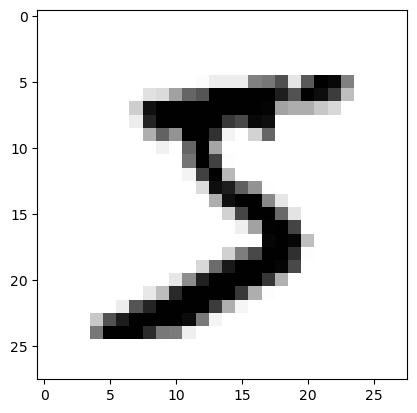

In [143]:

plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.show()

In [144]:
train_labels[0]

5

In [145]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [146]:

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [150]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [151]:
model.compile(optimizer='SGD',loss='categorical_crossentropy', metrics=['AUC'])

In [152]:
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8469 - loss: 1.6970 - val_AUC: 0.9873 - val_loss: 0.5139
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9879 - loss: 0.4765 - val_AUC: 0.9916 - val_loss: 0.3516
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9917 - loss: 0.3490 - val_AUC: 0.9928 - val_loss: 0.3033
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9929 - loss: 0.3041 - val_AUC: 0.9936 - val_loss: 0.2730
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9937 - loss: 0.2769 - val_AUC: 0.9943 - val_loss: 0.2512
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9946 - loss: 0.2555 - val_AUC: 0.9951 - val_loss: 0.2330
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9952 - loss: 0.2359 - val_AUC: 0.9953 - val_loss: 0.2187
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9952 - loss: 0.2234 - val_AUC: 0.9958 - val_loss: 0.2062
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AU

In [153]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - AUC: 0.9958 - loss: 0.2168
test_acc: 0.9963126182556152


In [154]:

model.predict(np.reshape(test_images[1], (1, 28, 28)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[7.0472516e-04, 6.0339207e-05, 9.9001187e-01, 2.9769875e-03,
        1.6845350e-07, 4.0368695e-04, 4.4275746e-03, 6.0118900e-08,
        1.4145734e-03, 3.8176381e-08]], dtype=float32)

In [155]:
test_images[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [156]:
test_labels[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [252]:
def upload_predict(path: str, model_predict: Sequential) -> np.ndarray:
    img = load_img(path, target_size=(28, 28))
    img_numpy_array: np.ndarray = img_to_array(img)

    new_arr = img_numpy_array.reshape(-1, 3)
    new_arr = new_arr[:,0] # берем только первый столбец 
    new_arr = new_arr.reshape(28, 28)

    plt.imshow(new_arr,cmap=plt.cm.binary)
    plt.show()

    num = new_arr / 255.0

    return model_predict.predict(np.reshape(num, (1, 28, 28)))

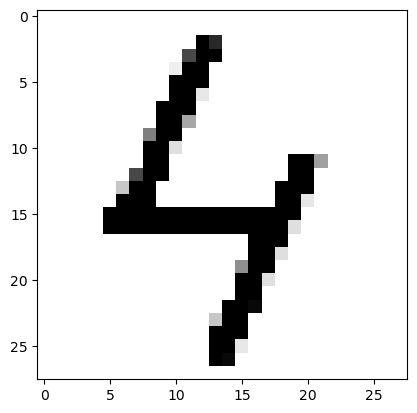

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[6.9308653e-04, 2.2453985e-06, 7.0467102e-03, 2.0391653e-05,
        9.5647758e-01, 1.1209577e-03, 1.7756565e-02, 2.1488022e-03,
        4.4007029e-04, 1.4293641e-02]], dtype=float32)

In [253]:
upload_predict('f1.png', model)